# Multichannel audio source separation by AuxIVA-IP

In [ ]:
%%shell
git clone https://github.com/tky823/audio_source_separation.git

Cloning into 'audio_source_separation'...
remote: Enumerating objects: 2434, done.
remote: Counting objects: 100% (431/431), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 2434 (delta 274), reused 300 (delta 163), pack-reused 2003
Receiving objects: 100% (2434/2434), 21.75 MiB | 34.48 MiB/s, done.
Resolving deltas: 100% (1283/1283), done.


In [ ]:
%cd "/content/audio_source_separation/egs/bss-example/iva"

/content/audio_source_separation/egs/bss-example/iva


In [ ]:
import sys
sys.path.append("../../../src")

In [ ]:
import numpy as np
import scipy.signal as ss
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt

In [ ]:
from bss.iva import AuxLaplaceIVA, AuxGaussIVA

In [ ]:
plt.rcParams['figure.dpi'] = 200

## 1\. Music source separation

### Data preparation for music source separation
We already created multichannel mixtures using the impulse responses of [Multi-Channel Impulse Response Database](https://www.iks.rwth-aachen.de/en/research/tools-downloads/databases/multi-channel-impulse-response-database/).
You can find the original sources (piano & violin) and its mixture in `audio_source_separation/dataset/sample-song/`.

### Target sources

In [ ]:
source_piano, sr = sf.read("../../../dataset/sample-song/sample-2_piano_16000.wav")
source_violin, sr = sf.read("../../../dataset/sample-song/sample-2_violin_16000.wav")

In [ ]:
display(ipd.Audio(source_piano, rate=sr))
display(ipd.Audio(source_violin, rate=sr))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
y = np.vstack([source_piano, source_violin])

### Mixture

In [ ]:
mixture, sr = sf.read("../../../dataset/sample-song/sample-2_mixture_16000.wav")
x = mixture.T
n_channels, T = x.shape
n_sources = n_channels

In [ ]:
for idx in range(n_channels):
    display(ipd.Audio(x[idx], rate=sr))

Output hidden; open in https://colab.research.google.com to view.

Configuration of STFT
- The reverberation time is $T_{60}=160$ [ms] in the impulse response.
- The window length is $4096$ samples (= $256$ [ms]) because of the assumption of rank-1 constraint.
- The hop length is the half of the window length, i.e. $2048$ samples (= $128$ [ms]) .

In [ ]:
fft_size, hop_size = 4096, 2048

In [ ]:
_, _, X = ss.stft(x, nperseg=fft_size, noverlap=fft_size-hop_size)

### Exection of Laplace IVA

In [ ]:
np.random.seed(111)
laplace_iva = AuxLaplaceIVA(algorithm_spatial='IP')

In [ ]:
print(laplace_iva)

AuxLaplaceIVA(algorithm_spatial=IP)


In [ ]:
Y = laplace_iva(X, iteration=100)

In [ ]:
_, y = ss.istft(Y, nperseg=fft_size, noverlap=fft_size-hop_size)
y = y[:, :T]

### Separated sources

In [ ]:
for idx in range(n_sources):
    display(ipd.Audio(y[idx], rate=sr))

Output hidden; open in https://colab.research.google.com to view.

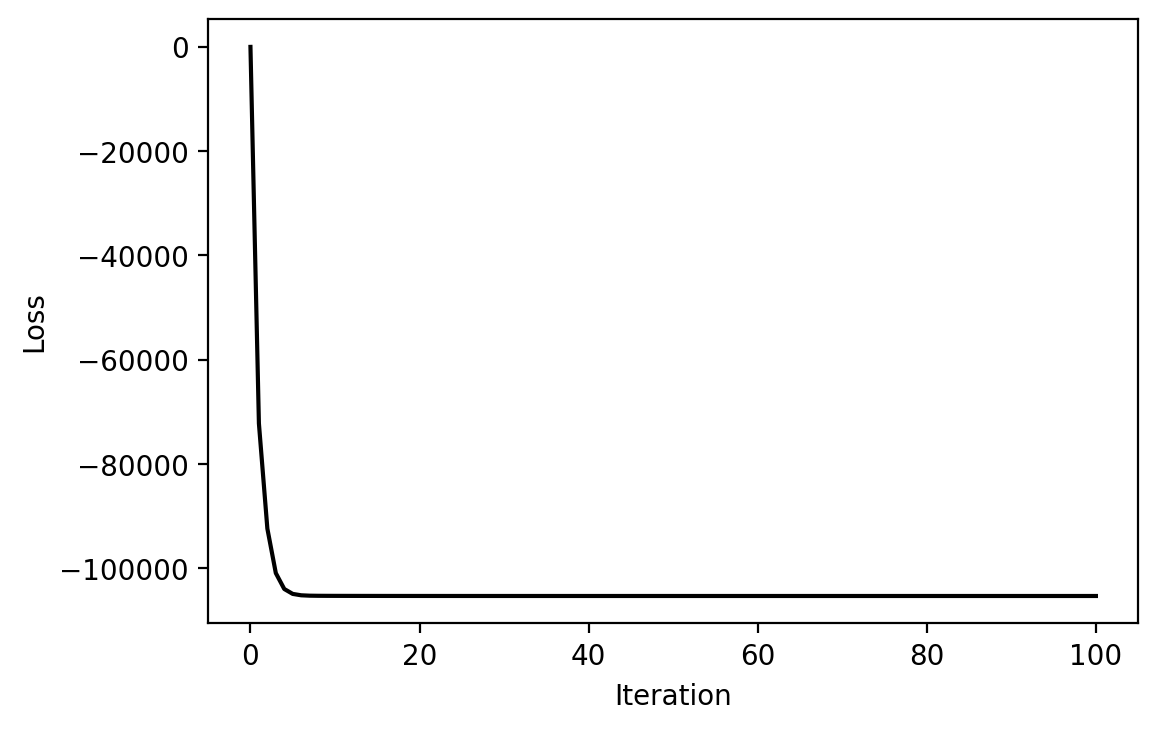

In [ ]:
plt.figure()
plt.plot(laplace_iva.loss, color='black')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

### Execution of Gauss IVA

In [ ]:
np.random.seed(111)
gauss_iva = AuxGaussIVA(algorithm_spatial='IP')

In [ ]:
print(gauss_iva)

AuxGaussIVA(algorithm_spatial=IP)


In [ ]:
Y = gauss_iva(X, iteration=100)

In [ ]:
_, y = ss.istft(Y, nperseg=fft_size, noverlap=fft_size-hop_size)
y = y[:, :T]

### Separated sources

In [ ]:
for idx in range(n_sources):
    display(ipd.Audio(y[idx], rate=sr))

Output hidden; open in https://colab.research.google.com to view.

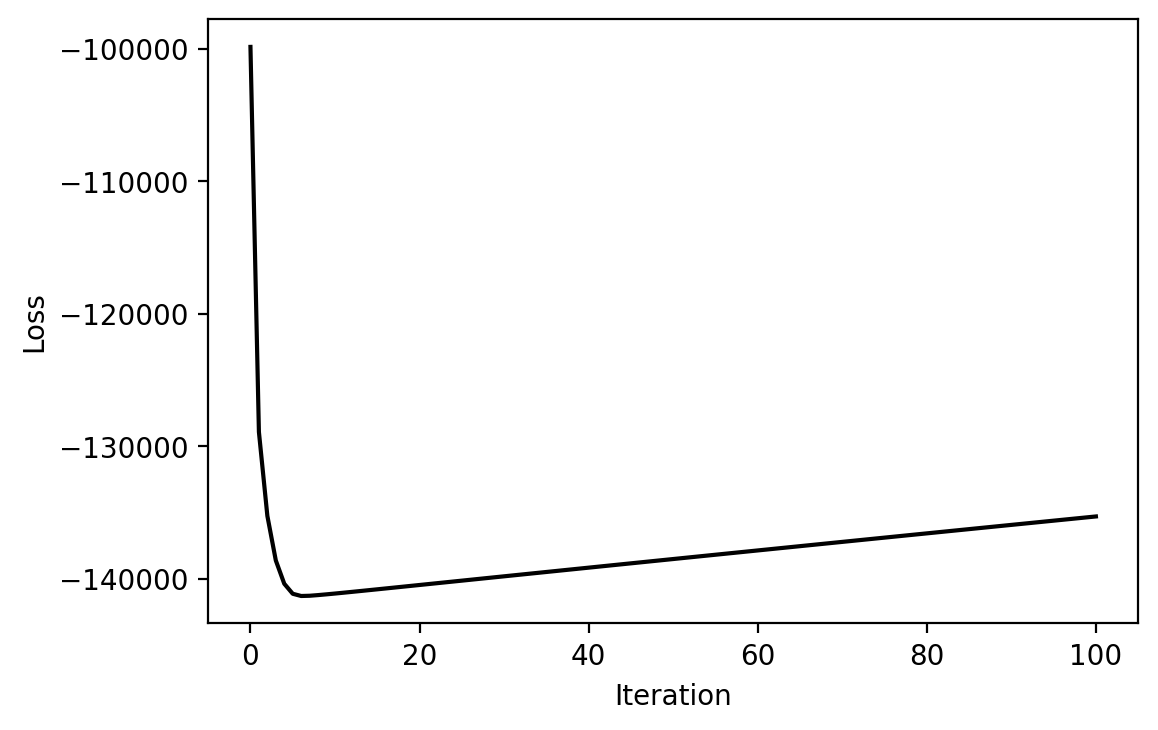

In [ ]:
plt.figure()
plt.plot(gauss_iva.loss, color='black')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## 2\. Speech separation

### 2.1 Data preparation for speech separation
Create multichannel mixtures using the audios of [CMU ARCTIC database](http://www.festvox.org/cmu_arctic/) and impulse responses of [Multi-Channel Impulse Response Database](https://www.iks.rwth-aachen.de/en/research/tools-downloads/databases/multi-channel-impulse-response-database/).

In [ ]:
%%shell
. ./prepare.sh

--2021-05-24 13:11:35--  http://festvox.org/cmu_arctic/packed/cmu_us_aew_arctic.tar.bz2
Resolving festvox.org (festvox.org)... 199.4.150.154
Connecting to festvox.org (festvox.org)|199.4.150.154|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93295070 (89M) [application/x-bzip2]
Saving to: ‘data/cmu_us_aew_arctic.tar.bz2’

data/cmu_us_aew_arc 100%[===================>]  88.97M  23.9MB/s    in 4.6s    

2021-05-24 13:11:40 (19.4 MB/s) - ‘data/cmu_us_aew_arctic.tar.bz2’ saved [93295070/93295070]

cmu_us_aew_arctic/wav/
cmu_us_aew_arctic/wav/arctic_a0457.wav
cmu_us_aew_arctic/wav/arctic_a0101.wav
cmu_us_aew_arctic/wav/arctic_a0413.wav
cmu_us_aew_arctic/wav/arctic_a0526.wav
cmu_us_aew_arctic/wav/arctic_b0285.wav
cmu_us_aew_arctic/wav/arctic_a0568.wav
cmu_us_aew_arctic/wav/arctic_a0483.wav
cmu_us_aew_arctic/wav/arctic_a0481.wav
cmu_us_aew_arctic/wav/arctic_b0412.wav
cmu_us_aew_arctic/wav/arctic_a0041.wav
cmu_us_aew_arctic/wav/arctic_a0278.wav
cmu_us_aew_arctic/wav/a

Configuration of STFT
- The reverberation time is $T_{60}=160$ [ms] in the impulse response.
- The window length is $4096$ samples (= $256$ [ms]) because of the assumption of rank-1 constraint.
- The hop length is the half of the window length, i.e. $2048$ samples (= $128$ [ms]) .

In [ ]:
fft_size, hop_size = 4096, 2048

### 2.2 2 speakers

In [ ]:
aew_mic3, sr = sf.read("./data/cmu_us_aew_arctic/trimmed/convolved-16000_deg60-mic3.wav")
axb_mic3, sr = sf.read("./data/cmu_us_axb_arctic/trimmed/convolved-16000_deg300-mic3.wav")
x_mic3 = aew_mic3 + axb_mic3

aew_mic4, sr = sf.read("./data/cmu_us_aew_arctic/trimmed/convolved-16000_deg60-mic4.wav")
axb_mic4, sr = sf.read("./data/cmu_us_axb_arctic/trimmed/convolved-16000_deg300-mic4.wav")
x_mic4 = aew_mic4 + axb_mic4

x = np.vstack([x_mic3, x_mic4])
n_channels, T = x.shape
n_sources = n_channels

#### Target sources after convolution of impulse response

In [ ]:
display(ipd.Audio(aew_mic3, rate=sr))
display(ipd.Audio(axb_mic3, rate=sr))

#### Mixture

In [ ]:
for idx in range(n_channels):
    display(ipd.Audio(x[idx], rate=sr))

#### Execution of IVA

In [ ]:
_, _, X = ss.stft(x, nperseg=fft_size, noverlap=hop_size)

In [ ]:
np.random.seed(111)
iva = AuxLaplaceIVA(algorithm_spatial='IP')

In [ ]:
print(iva)

AuxLaplaceIVA(algorithm_spatial=IP)


In [ ]:
Y = iva(X, iteration=50)

In [ ]:
_, y = ss.istft(Y, nperseg=fft_size, noverlap=fft_size-hop_size)
y = y[:,:T]

#### Separated sources

In [ ]:
for idx in range(n_sources):
    display(ipd.Audio(y[idx], rate=sr))

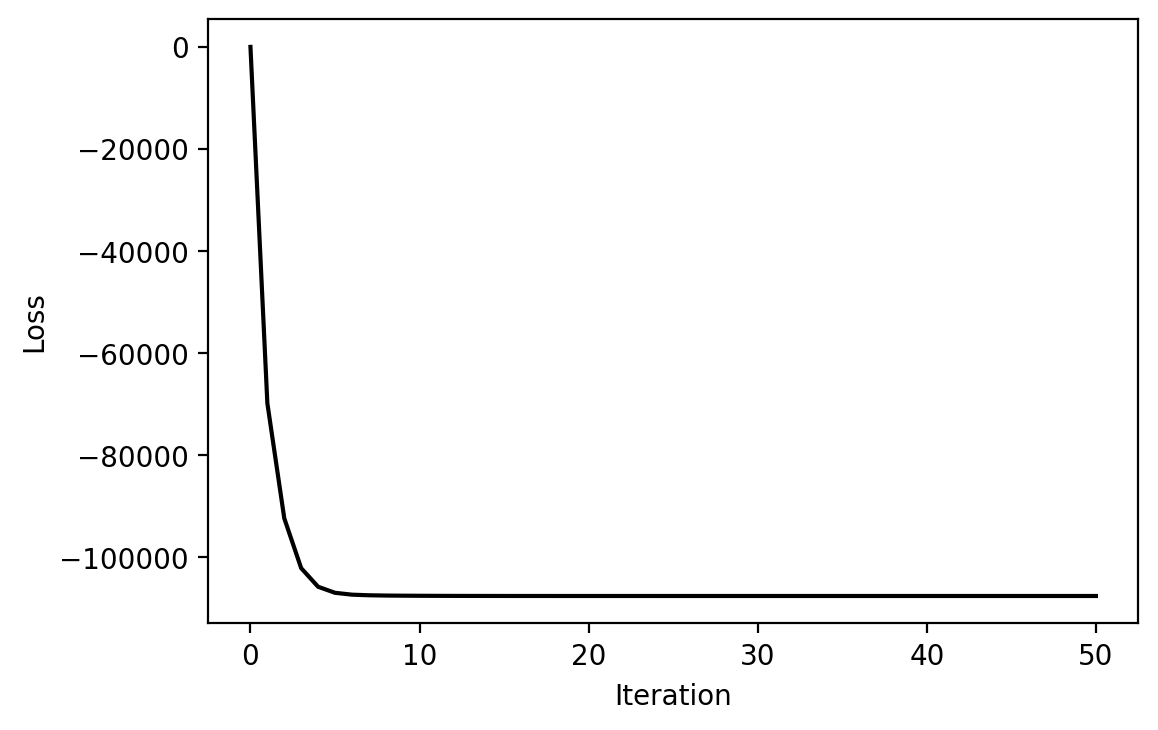

In [ ]:
plt.figure()
plt.plot(iva.loss, color='black')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

### 2.3 3 speakers

In [ ]:
aew_mic2, sr = sf.read("./data/cmu_us_aew_arctic/trimmed/convolved-16000_deg60-mic2.wav")
axb_mic2, sr = sf.read("./data/cmu_us_axb_arctic/trimmed/convolved-16000_deg300-mic2.wav")
bdl_mic2, sr = sf.read("./data/cmu_us_bdl_arctic/trimmed/convolved-16000_deg330-mic2.wav")
x_mic2 = aew_mic2 + axb_mic2 + bdl_mic2

aew_mic4, sr = sf.read("./data/cmu_us_aew_arctic/trimmed/convolved-16000_deg60-mic4.wav")
axb_mic4, sr = sf.read("./data/cmu_us_axb_arctic/trimmed/convolved-16000_deg300-mic4.wav")
bdl_mic4, sr = sf.read("./data/cmu_us_bdl_arctic/trimmed/convolved-16000_deg330-mic4.wav")
x_mic4 = aew_mic4 + axb_mic4 + bdl_mic4

aew_mic5, sr = sf.read("./data/cmu_us_aew_arctic/trimmed/convolved-16000_deg60-mic5.wav")
axb_mic5, sr = sf.read("./data/cmu_us_axb_arctic/trimmed/convolved-16000_deg300-mic5.wav")
bdl_mic5, sr = sf.read("./data/cmu_us_bdl_arctic/trimmed/convolved-16000_deg330-mic5.wav")
x_mic5 = aew_mic5 + axb_mic5 + bdl_mic5

x = np.vstack([x_mic2, x_mic4, x_mic5])
n_channels, T = x.shape
n_sources = n_channels

#### Target sources after convolution of impulse response

In [ ]:
display(ipd.Audio(aew_mic2, rate=sr))
display(ipd.Audio(axb_mic2, rate=sr))
display(ipd.Audio(bdl_mic2, rate=sr))

#### Mixture

In [ ]:
for idx in range(n_channels):
    display(ipd.Audio(x[idx], rate=sr))

#### Execution of IVA

In [ ]:
_, _, X = ss.stft(x, nperseg=fft_size, noverlap=fft_size-hop_size)

In [ ]:
np.random.seed(111)
iva = AuxLaplaceIVA(algorithm_spatial='IP')

In [ ]:
print(iva)

In [ ]:
Y = iva(X, iteration=100)

In [ ]:
_, y = ss.istft(Y, nperseg=fft_size, noverlap=fft_size-hop_size)
y = y[:,:T]

#### Separated sources

In [ ]:
for idx in range(n_sources):
    display(ipd.Audio(y[idx], rate=sr))

In [ ]:
plt.figure()
plt.plot(iva.loss, color='black')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## 3\. Example of Callback Function

In [ ]:
aew_mic3, sr = sf.read("./data/cmu_us_aew_arctic/trimmed/convolved-16000_deg60-mic3.wav")
axb_mic3, sr = sf.read("./data/cmu_us_axb_arctic/trimmed/convolved-16000_deg300-mic3.wav")
x_mic3 = aew_mic3 + axb_mic3

aew_mic4, sr = sf.read("./data/cmu_us_aew_arctic/trimmed/convolved-16000_deg60-mic4.wav")
axb_mic4, sr = sf.read("./data/cmu_us_axb_arctic/trimmed/convolved-16000_deg300-mic4.wav")
x_mic4 = aew_mic4 + axb_mic4

x = np.vstack([x_mic3, x_mic4])
n_channels, T = x.shape
n_sources = n_channels

In [ ]:
s = np.vstack([aew_mic3, axb_mic3])
_, _, X = ss.stft(x, nperseg=fft_size, noverlap=fft_size-hop_size)

### 3.1 Record SDR improvement

In [ ]:
%%shell
pip install mir_eval

In [ ]:
from mir_eval.separation import bss_eval_sources

In [ ]:
from algorithm.projection_back import projection_back

In [ ]:
def record_sdri(model):
    reference_id = model.reference_id
    s = model.target # Time domain
    X, Y = model.input, model.estimation # Time-frequency domain
    n_sources, T = s.shape

    scale = projection_back(Y, reference=X[reference_id])
    Y = Y * scale[...,np.newaxis] # (n_sources, n_bins, n_frames)
    _, y = ss.istft(Y, nperseg=fft_size, noverlap=fft_size-hop_size)
    y = y[:,:T]

    sdr_estimated, _, _, _ = bss_eval_sources(s, estimated_sources=y)

    if hasattr(model, 'sdr_input'):
        sdr_input = model.sdr_input
    else:
        sdr_input = sdr_estimated
        model.sdr_input = sdr_input
    
    sdri = sdr_estimated - sdr_input
    
    model.sdri.append(sdri.mean())

In [ ]:
np.random.seed(111)
iva = AuxLaplaceIVA(algorithm_spatial='IP', callbacks=record_sdri)

In [ ]:
Y = iva(X, iteration=100, target=s, sdri=[])

In [ ]:
plt.figure()
plt.plot(iva.sdri, color='black')
plt.xlabel('Iteration')
plt.ylabel('SDR improvement')
plt.show()